# First SSVEP dataset
**labels:**

0 - no flickering

1 2 3 4 - for the boxes


**id label alphabetical:**

0 - alebs

1 - barlo

2 - yagmur

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
import scipy.fftpack
from scipy.signal import butter, lfilter, filtfilt

%matplotlib inline

## Load Data

In [2]:
# load and sort the paths
path = '../data/raw/'
sampling_rate = 128

fnames = glob(path+'*.csv') # get paths and save them
fnames.sort()
fnames

['../data/raw/alebs-record.csv',
 '../data/raw/barlo-record.csv',
 '../data/raw/yagmur-record.csv']

In [3]:
col_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'label']
data = {}
for i, name in enumerate(fnames):
    data[i] = pd.read_csv(name, names=col_names)
    data[i]['id'] = i
    
data[1].tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label,id
66555,4039.9,4033.7,4141.5,4106.5,4103.2,4094.4,4122.8,4137.7,4138.7,4128.8,4123.6,4101.5,4093.6,4010.6,0,1
66556,4042.9,4030.0,4139.4,4111.2,4106.3,4094.2,4122.4,4135.1,4137.9,4128.3,4127.8,4102.4,4095.8,4012.8,0,1
66557,4081.3,4049.1,4147.9,4115.6,4108.6,4094.5,4124.6,4130.6,4126.3,4126.0,4131.2,4101.3,4093.7,4009.6,0,1
66558,4076.2,4047.7,4146.5,4115.0,4109.6,4099.6,4129.4,4133.3,4128.7,4131.0,4125.4,4100.1,4094.5,4007.1,0,1
66559,4041.0,4025.9,4136.3,4117.3,4114.1,4108.5,4136.5,4140.3,4144.4,4138.5,4121.4,4100.5,4095.8,3998.8,0,1


In [4]:
data_all = pd.DataFrame()

for i in np.arange(0,3):
    data_all = pd.concat([data_all, data[i]], axis=0, ignore_index=True)

In [5]:
carlo = data[1]
carlo.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label,id
0,4252.3,4147.3,4141.2,4156.5,4167.7,4112.9,4119.7,4073.1,4121.3,4075.6,4141.3,4091.9,4102.9,4190.6,0,1
1,4264.1,4155.4,4137.4,4150.1,4159.7,4114.4,4118.1,4070.8,4118.2,4090.5,4138.1,4085.3,4113.1,4193.5,0,1
2,4257.1,4151.3,4133.8,4141.7,4161.0,4112.4,4113.8,4071.4,4113.5,4078.8,4133.7,4082.9,4108.7,4186.0,0,1
3,4230.4,4139.0,4132.3,4145.3,4174.7,4109.9,4115.1,4080.0,4111.8,4050.5,4135.8,4087.1,4090.5,4172.2,0,1
4,16914.0,16563.0,16537.0,16589.0,16692.0,16453.0,16483.0,16328.0,16473.0,16244.0,16548.0,16348.0,16376.0,16688.0,0,1


In [6]:
aleks = data[0]
aleks.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label,id
0,4094.2,4093.8,4087.6,4114.6,4096.5,4099.0,4091.3,4092.2,4100.3,4125.3,4121.3,4080.4,4102.3,4093.2,0,0
1,4103.7,4108.2,4092.8,4115.4,4108.5,4105.0,4094.4,4102.8,4101.0,4122.8,4117.1,4091.0,4106.4,4096.5,0,0
2,4109.7,4113.1,4098.2,4119.1,4110.0,4111.5,4101.4,4110.1,4106.3,4133.6,4120.3,4098.7,4109.1,4102.8,0,0
3,4109.7,4115.9,4100.4,4125.9,4119.9,4107.9,4104.2,4103.8,4101.4,4140.5,4131.4,4097.6,4111.4,4106.3,0,0
4,4101.2,4112.3,4094.7,4124.5,4121.0,4100.3,4098.8,4092.8,4092.4,4131.2,4129.0,4086.3,4107.6,4098.2,0,0


In [7]:
yagmur = data[2]
yagmur.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label,id
0,4119.7,4119.0,4165.4,4130.6,4119.0,4108.2,4065.0,4070.3,4103.7,4110.3,4128.6,4095.1,4121.2,4132.9,0,2
1,4121.5,4120.6,4167.8,4133.7,4118.3,4109.2,4065.8,4070.0,4106.3,4113.6,4133.6,4093.7,4127.4,4135.4,0,2
2,4121.2,4117.9,4170.3,4131.7,4121.7,4112.4,4066.0,4065.5,4104.5,4113.1,4133.6,4087.8,4120.9,4129.0,0,2
3,4120.4,4116.8,4169.4,4129.6,4125.5,4114.5,4066.8,4064.6,4101.7,4108.8,4129.9,4086.7,4113.7,4125.4,0,2
4,4114.7,4116.4,4165.8,4128.5,4124.1,4112.7,4069.7,4065.5,4101.3,4094.9,4120.6,4089.0,4107.1,4127.7,0,2


## Epochs

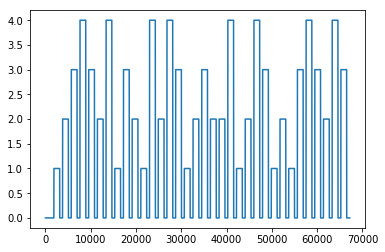

In [222]:
plt.plot(yagmur.label)

### Get indexes of on and off of each stimuli

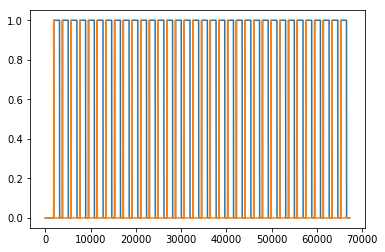

In [14]:
threshold = 0.5

idxOFF = np.argwhere(yagmur.label < threshold)
idxON = np.argwhere(yagmur.label > threshold)


x_alwaysON = np.zeros(len(yagmur.index))
x_alwaysON[idxON] = 1

x_turnON = np.roll(x_alwaysON, 1)
x_turnON = x_alwaysON - x_turnON
x_turnON = np.where(x_turnON > 0, x_turnON, 0)

plt.plot(x_alwaysON)
plt.plot(x_turnON)
plt.show()

### Get Yagmurs epochs

In [30]:
epochs = np.zeros((len( np.argwhere(x_turnON) ),1000)) 

for n, i in enumerate(np.argwhere(x_turnON)):  
    epochs[n] = yagmur.AF3[i[0]+100:i[0]+1100]

np.shape(epochs)

(34, 1000)

## Applying Bandpass Filter on One Channel

In [33]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filtfilt(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return filtfilt(b, a, data) 

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [73]:
yagmur_filt = np.zeros_like(epochs)

for i in np.arange(0, 34, 1):
    yagmur_filt[i] = butter_bandpass_filtfilt(epochs[i], 5, 30, sampling_rate)
yagmur_filt

array([[ 2.18431874e-02,  4.10110015e+00,  5.84969918e+00, ...,
         6.45292504e+00,  5.57291176e+00, -3.22031958e-01],
       [ 1.22292980e-01,  3.18677464e+00,  4.31530671e+00, ...,
         1.69310837e+00,  8.44479018e-01, -3.44138943e-01],
       [-9.31844183e-03, -7.19517808e+00, -8.97599455e+00, ...,
        -3.96734770e+01, -3.15290255e+01,  9.63878024e-02],
       ...,
       [-9.26120521e-02, -5.84583515e+00, -9.41866594e+00, ...,
         7.49322915e+00,  1.31302672e+00, -6.37661414e-01],
       [-9.04450094e-02,  2.16122026e+01,  2.66857144e+01, ...,
         5.23844509e+00,  1.79958355e+00, -1.00521569e+00],
       [-1.07531441e-01,  1.61941351e+01,  1.82095201e+01, ...,
         2.34662934e+01,  2.62111028e+01, -1.18669228e+00]])

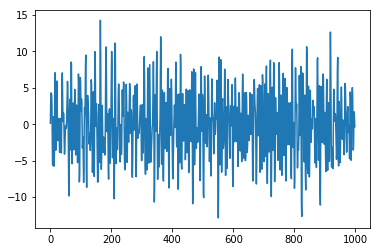

In [74]:
plt.plot(yagmur_filt[1])

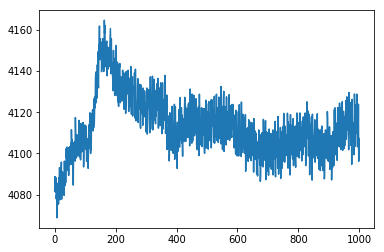

In [75]:
plt.plot(epochs[1])

## Applying Correlation Coefficience for One Channel 

In [85]:
def series_coeff(epoch, freq):
    num_samples = len(epoch)
    sampling_rate = 128
    
    time = np.arange(0,(num_samples)/sampling_rate, 1/sampling_rate)
    base_sin =  np.sin(2*np.pi*time*freq)
    coeff = stats.pearsonr(x=epoch, y=base_sin)
    return coeff[0]
    

    series_coeff(epochs[0], 20)

## Get coefficients for each epoch and each frequency

In [175]:
Coefficients_20 = np.zeros(34)
for i in np.arange(0, 34, 1):
    Coefficients_20[i] = series_coeff(epochs[i], 20)
# Coefficients_20

In [176]:
Coefficients_15 = np.zeros(34)
for i in np.arange(0, 34, 1):
    Coefficients_15[i] = series_coeff(epochs[i], 15)
# Coefficients_15

In [177]:
Coefficients_12 = np.zeros(34)
for i in np.arange(0, 34, 1):
    Coefficients_12[i] = series_coeff(epochs[i], 12)
# Coefficients_12

## Get Labels for each epoch

In [178]:
I = np.zeros(len(np.argwhere(x_turnON)))
i = 0
for n in np.argwhere(x_turnON):
    I[i] = yagmur.label[n]
    i+=1
len(I)

34

In [179]:
# plt.figure(figsize=(10,10))
# plt.scatter(np.arange(0,34),I)
# plt.plot(np.arange(0,34), Coefficients*100)
# plt.grid()
# plt.savefig('a.jpg')

In [181]:
data = [Coefficients, I]
data
DF20 = pd.DataFrame(data=Coefficients_20, columns={'coeff20'})
DF15 = pd.DataFrame(data=Coefficients_15, columns={'coeff15'})
DF12 = pd.DataFrame(data=Coefficients_12, columns={'coeff12'})
labels = pd.DataFrame(data=I, columns={'label'})

DF = pd.concat([DF20, DF15, DF12, labels], axis=1)
DF.head()

,coeff20,coeff15,coeff12,label
0,0.003718,-0.007201,-0.006129,1.0
1,0.009109,0.007981,-0.021127,2.0
2,-0.008206,0.007769,0.015996,3.0
3,0.009701,-0.000260,0.004649,4.0
4,0.011268,0.002317,-0.000156,3.0


In [190]:
data = [Coefficients, I]
data
DF20 = pd.DataFrame(data=Coefficients_20, columns={'3'})
DF15 = pd.DataFrame(data=Coefficients_15, columns={'2'})
DF12 = pd.DataFrame(data=Coefficients_12, columns={'1'})
labels = pd.DataFrame(data=I, columns={'label'})

DF = pd.concat([DF20, DF15, DF12, labels], axis=1)
DF.head()

,3,2,1,label
0,0.003718,-0.007201,-0.006129,1.0
1,0.009109,0.007981,-0.021127,2.0
2,-0.008206,0.007769,0.015996,3.0
3,0.009701,-0.000260,0.004649,4.0
4,0.011268,0.002317,-0.000156,3.0


In [237]:
DF['Max'] = DF[['3','2','1']].idxmax(axis=1)
DF['Max'] = DF['Max'].astype(int)
DF['dif'] = (DF.Max) - (DF.label)
# DF.dif

In [238]:
len(DF[DF.dif==0]) / len(DF.dif)

0.29411764705882354

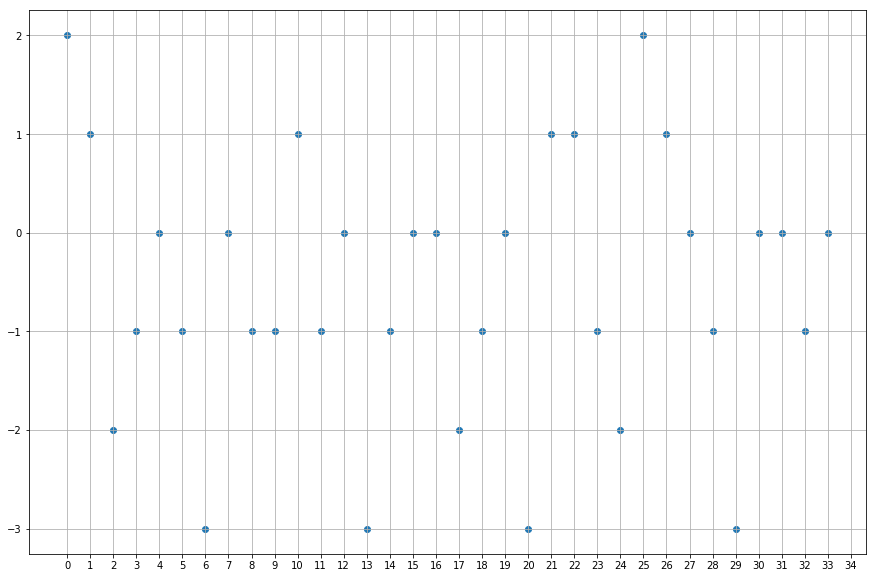

In [236]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(np.arange(0,34),DF.dif)
ax.set_xticks(np.arange(0,35,1))

plt.grid()

/home/ateska/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ateska/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ateska/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ateska/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


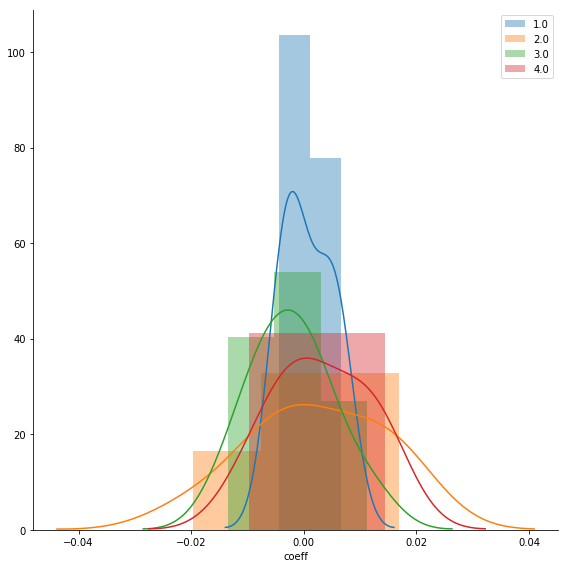

In [169]:
g = sns.FacetGrid(data=DF, size=8, hue='label')
g.map(sns.distplot, 'coeff');
plt.legend();